In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import wordcloud
import nltk
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("spam.csv",encoding = 'latin-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.rename(columns = {'v1':'class_label','v2':'message'},inplace=True)
df.head()


class_label                                            message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
fig = px.histogram(df, x="class_label", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"])
fig.show()


In [10]:
df['length'] = df['message'].apply(len)
df.head()


class_label                                            message  length
0         ham  Go until jurong point, crazy.. Available only ...     111
1         ham                      Ok lar... Joking wif u oni...      29
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3         ham  U dun say so early hor... U c already then say...      49
4         ham  Nah I don't think he goes to usf, he lives aro...      61

In [11]:
fig = px.histogram(df, x="length", color="class_label", color_discrete_sequence=["#871fff","#ffa78c"] )
fig.show()


In [12]:
data_ham  = df[df['class_label'] == "ham"].copy()
data_spam = df[df['class_label'] == "spam"].copy()

def show_wordcloud(df, title):
	text = ' '.join(df['message'].astype(str).tolist())
	stopwords = set(wordcloud.STOPWORDS)
	fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffa78c",
                                    width = 3000, height = 2000).generate(text)
	plt.figure(figsize=(15,15), frameon=True)
	plt.imshow(fig_wordcloud)
	plt.axis('off')
	plt.title(title, fontsize=20)
	plt.show()


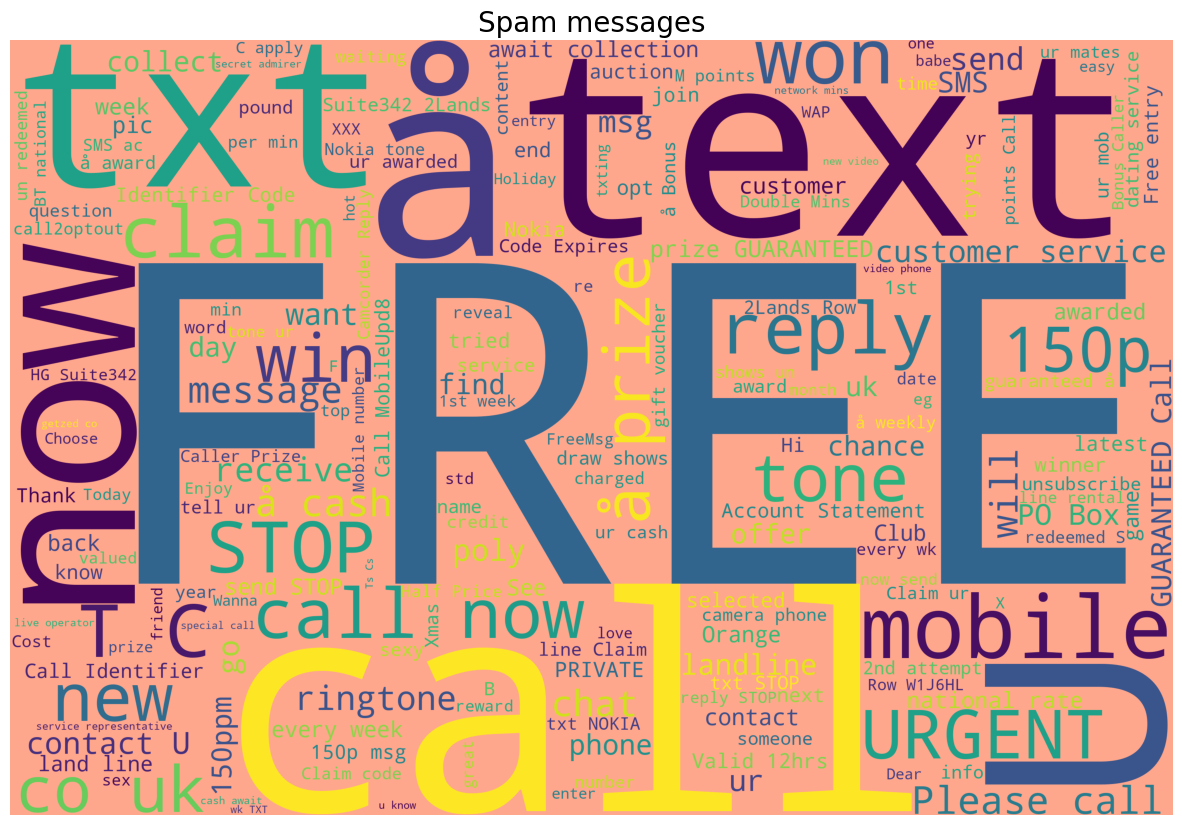

In [13]:
show_wordcloud(data_spam, "Spam messages")


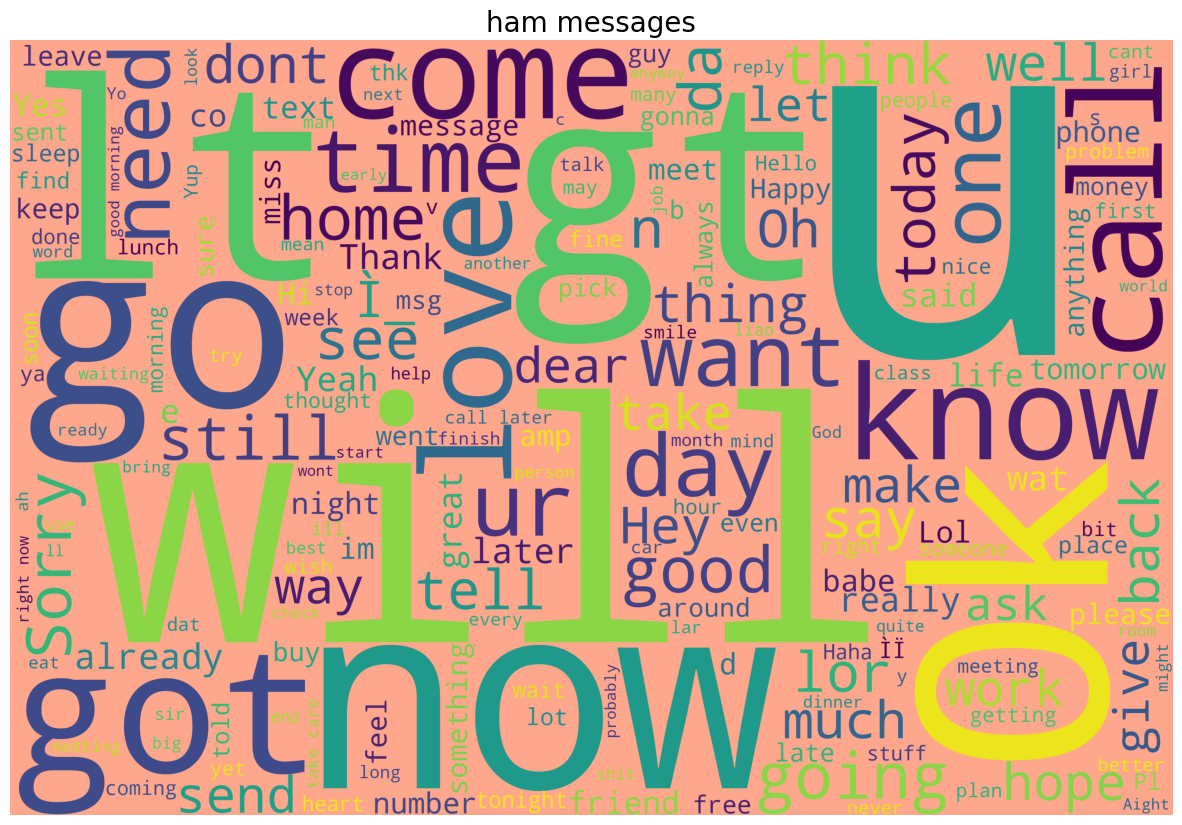

In [14]:
show_wordcloud(data_ham, "ham messages")


In [15]:
df['class_label'] = df['class_label'].map( {'spam': 1, 'ham': 0})


In [16]:
# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol')

# Replace 10 digit phone number with 'phone-number'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

# Replace normal number with 'number'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

# remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# remove whitespace between terms with single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s*?$', ' ')

# change words to lower case
df['message'] = df['message'].str.lower()


In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


In [18]:
ss = nltk.SnowballStemmer("english")
df['message'] = df['message'].apply(lambda x: ' '.join(ss.stem(term) for term in x.split()))


In [22]:
sms_df = df['message']
from nltk.tokenize import word_tokenize

# creating a bag-of-words model
all_words = []
for sms in sms_df:
	words = word_tokenize(sms)
	for w in words:
		all_words.append(w)

all_words = nltk.FreqDist(all_words)


In [23]:
print('Number of words: {}'.format(len(all_words)))


Number of words: 8905


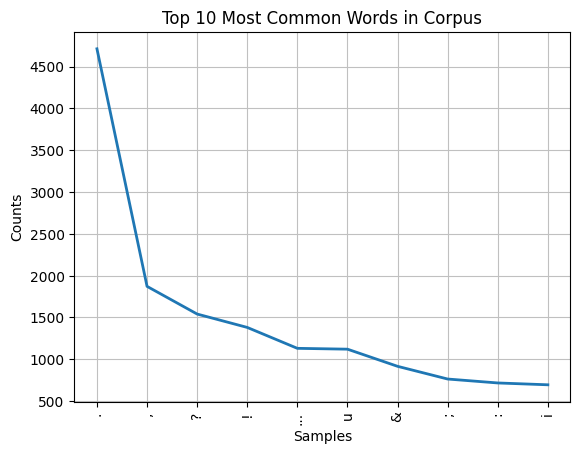

In [24]:
all_words.plot(10, title='Top 10 Most Common Words in Corpus');


In [29]:
import os
import pickle

# Create the directory if it doesn't exist
model_dir = "../model/"
os.makedirs(model_dir, exist_ok=True)

# Serialize the model
with open(os.path.join(model_dir, "tfidf_model.pkl"), "wb") as file:
    pickle.dump(tfidf_model, file)

# Continue with the rest of your code
tfidf_data = pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()


0     1     2     3     4     5     6     7     8     9     ...  8148  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   8149  8150  8151  8152  8153  8154  8155  8156  8157  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 8158 columns]

In [30]:
### Separating Columns
df_train = tfidf_data.iloc[:4457]
df_test = tfidf_data.iloc[4457:]

target = df['class_label']
df_train['class_label'] = target

Y = df_train['class_label']
X = df_train.drop('class_label',axis=1)

# splitting training data into train and validation using sklearn
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)


In [32]:
import lightgbm as lgb
from sklearn.metrics import f1_score

def train_and_test(model, model_name):
	model.fit(X_train, y_train)
	pred = model.predict(X_test)
	print(f'F1 score is: {f1_score(pred, y_test)}')
    
for depth in [1,2,3,4,5,6,7,8,9,10]:
	lgbmodel = lgb.LGBMClassifier(max_depth=depth, n_estimators=200, num_leaves=40)
	print(f"Max Depth {depth}")
	print(" ")
	print(" ")
	train_and_test(lgbmodel, "Light GBM")


Max Depth 1
 
 
[LightGBM] [Info] Number of positive: 471, number of negative: 3094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5604
[LightGBM] [Info] Number of data points in the train set: 3565, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.132118 -> initscore=-1.882362
[LightGBM] [Info] Start training from score -1.882362
F1 score is: 0.8125
Max Depth 2
 
 
[LightGBM] [Info] Number of positive: 471, number of negative: 3094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5604
[LightGBM] [Info] Number of data points in the train set: 3565, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.132118 -> initscore=-1.882362
[LightGBM] [Info] St

In [33]:
from sklearn.model_selection import RandomizedSearchCV
lgbmodel_bst = lgb.LGBMClassifier(max_depth=6, n_estimators=200, num_leaves=40)
param_grid = {
	'num_leaves': list(range(8, 92, 4)),
	'min_data_in_leaf': [10, 20, 40, 60, 100],
	'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
	'learning_rate': [0.1, 0.05, 0.01, 0.005],
	'bagging_freq': [3, 4, 5, 6, 7],
	'bagging_fraction': np.linspace(0.6, 0.95, 10),
	'reg_alpha': np.linspace(0.1, 0.95, 10),
	'reg_lambda': np.linspace(0.1, 0.95, 10),
 	"min_split_gain": [0.0, 0.1, 0.01],
	"min_child_weight": [0.001, 0.01, 0.1, 0.001],
	"min_child_samples": [20, 30, 25],
	"subsample": [1.0, 0.5, 0.8],
}
model = RandomizedSearchCV(lgbmodel_bst, param_grid, random_state=1)
search = model.fit(X_train, y_train)
search.best_params_


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=0.5 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=0.5 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Info] Number of positive: 377, number of negative: 2475
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4236
[LightGBM] [Info] Number of data point

{'subsample': 0.5,
 'reg_lambda': 0.47777777777777775,
 'reg_alpha': 0.1,
 'num_leaves': 64,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'max_depth': 12,
 'learning_rate': 0.1,
 'bagging_freq': 3,
 'bagging_fraction': 0.7166666666666667}

In [34]:
best_model = lgb.LGBMClassifier(subsample=0.5,
                         	reg_lambda= 0.47777777777777775,
                         	reg_alpha= 0.5722222222222222,
                         	num_leaves= 88,
                         	min_split_gain= 0.01,
                         	min_data_in_leaf= 10,
                         	min_child_weight= 0.01,
                         	min_child_samples= 30,
                         	max_depth= 3,
                         	learning_rate= 0.1,
                         	bagging_freq= 3,
                         	bagging_fraction= 0.6,
                          	random_state=1)
best_model.fit(X_train,y_train)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 471, number of negative: 3094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7345
[LightGBM] [Info] Number of data points in

LGBMClassifier(bagging_fraction=0.6, bagging_freq=3, max_depth=3,
               min_child_samples=30, min_child_weight=0.01, min_data_in_leaf=10,
               min_split_gain=0.01, num_leaves=88, random_state=1,
               reg_alpha=0.5722222222222222, reg_lambda=0.47777777777777775,
               subsample=0.5)

In [35]:
prediction = best_model.predict(X_test)
print(f'F1 score is: {f1_score(prediction, y_test)}')


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
F1 score is: 0.8547008547008547


In [36]:
best_model.fit(tfidf_data, target)
pickle.dump(best_model, open("../model/spam_model.pkl","wb"))


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.5 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Info] Number of positive: 747, number of negative: 4825
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12474
[LightGBM] [Info] Number of data points i